# 911 Police Calls Data Set Cleanup, Merge, and Analysis

Here we take a massive 6 million long dataset with more than 10 columns and reduce it to something useful that we can merge with the data we found in the Census and Property Tax datasets. 


In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns; 

#### First, let's load in the dataset

In [2]:
df = pd.read_csv("911_Police_Calls_for_Service.csv", low_memory = False)
df

,RecordID,CallNumber,CallDateTime,Priority,District,Description,IncidentLocation,ZipCode,Neighborhood,PoliceDistrict,PolicePost,CouncilDistrict,SheriffDistricts,Community_Statistical_Areas,Census_Tracts,VRIZones,Location
0,887654,P181131920,04/23/2018 04:21:00 PM,Low,SD,OTHER,800 W PRATT ST,21201.0,Washington Village/Pigtown,Southern,932.0,10.0,D7,Washington Village/Pigtown,Census Tract 2102,NaN,"800 W PRATT ST\nBALTIMORE, MD\n(39.285931, -76..."
1,888256,P181131262,04/23/2018 12:53:00 PM,Low,WD,AUTO THEFT,1900 LAURETTA AV,21223.0,Midtown-Edmondson,Western,722.0,9.0,D8,Sandtown-Winchester/Harlem Park,Census Tract 1604,NaN,"1900 LAURETTA AV\nBALTIMORE, MD\n(39.294483, -..."
2,887619,P181131968,04/23/2018 04:33:00 PM,Medium,SW,COMMON ASSAULT,3000 W LANVALE ST,21216.0,Franklintown Road,Southwestern,814.0,9.0,D8,Greater Rosemont,Census Tract 1606,NaN,"3000 W LANVALE ST\nBALTIMORE, MD\n(39.297059, ..."
3,887694,P181131882,04/23/2018 04:09:00 PM,Non-Emergency,NE,Private Tow,4400 BELAIR RD,21206.0,Belair-Edison,Northeastern,442.0,2.0,D4,Cedonia/Frankford,Census Tract 2602.02,NaN,"4400 BELAIR RD\nBALTIMORE, MD\n(39.328972, -76..."
4,888006,P181131530,04/23/2018 02:23:00 PM,Medium,CW,Lab Request,4100 HAGUE AV,21225.0,Brooklyn,Southern,913.0,10.0,D7,Brooklyn/Curtis Bay/Hawkins Point,Census Tract 2504.02,NaN,"4100 HAGUE AV\nBALTIMORE, MD\n(39.228265, -76...."
5,888887,P181130510,04/23/2018 07:22:00 AM,Medium,NW,FAMILY DISTURB,4600 PARK HEIGHTS AV,21215.0,Central Park Heights,Northwestern,614.0,6.0,D1,Southern Park Heights,Census Tract 2716,NaN,"4600 PARK HEIGHTS AV\nBALTIMORE, MD\n(39.34241..."
6,887951,P181131604,04/23/2018 02:42:00 PM,Low,SD,Transport,SOUTHERN DISTRICT,21225.0,Middle Branch/Reedbird Parks,Southern,922.0,10.0,D7,Cherry Hill,Census Tract 2502.03,NaN,"SOUTHERN DISTRICT BALTIMORE, MD\n(39.554401, -..."
7,888713,P181130739,04/23/2018 09:17:00 AM,Medium,SW,NARCOTICSOutside,2700 WILKENS AV,21223.0,Millhill,Southwestern,841.0,9.0,D8,Southwest Baltimore,Census Tract 2005,NaN,"2700 WILKENS AV\nBALTIMORE, MD\n(39.278036, -7..."
8,10,P190531357,02/22/2019 10:06:00 AM,Non-Emergency,ND,Business Check,PALL MALL RD/WYLIE AV,21215.0,Parklane,Northern,532.0,6.0,D2,Southern Park Heights,Census Tract 2716,NaN,"PALL MALL RD\nBALTIMORE, MD"
9,888325,P181131178,04/23/2018 12:25:00 PM,Non-Emergency,SW,Hot Spot Check,4000 FREDERICK AV,21229.0,Irvington,Southwestern,833.0,8.0,D10,Allendale/Irvington/S. Hilton,Census Tract 2008,NaN,"4000 FREDERICK AV\nBALTIMORE, MD\n(39.281748, ..."


#### Intuitively, I think we want the location, Community_Statistical_Areas, Sheriff Districts, Council Districts, Police Districts, Neighborhood, ZipCode, Description, Priority, CallDateTime

#### Here are some things I noticed: 

- Location seems to be messed up with new line characters and combined with the actual address. We just want the lat and longitude. 

- There are some columns with NaN values lal over the place, and I think we have enough data that we can just eliminate those without loss


In [3]:
df_nona = df.copy()
df_nona = df_nona.dropna()
len(df_nona)

833182

well there's that, dropping that NaN values cuts the dataset tremendously, which kind of sucks. Lets get rid of the unecessary columns first and see if that makes a difference

In [4]:
df = df.drop(labels = ["RecordID", "CallNumber", "IncidentLocation", "ZipCode", "PolicePost", "Community_Statistical_Areas", "Census_Tracts", "VRIZones"], axis = 1)

In [5]:
df_nona = df.dropna()
len(df_nona)

6073460

Looks like that doesn't change much. We'll just dropna later after cutting it down in other ways, and exploring the columns

# Let's learn a bit about the columns. 

We probably won't need all of the columns we have now, even. At least not all at once. Let's explore the ones that are the most interesting, by choosing only one type of district, and leaving out location for now (which we'll have to clean up later). 

We'll look at: 

- District
- Description
- Neighborhood
- Priority

In [6]:
dfv2 = df.copy().drop(labels = ["PoliceDistrict", "CouncilDistrict", "SheriffDistricts","Location"], axis = 1)
dfv2.head()

,CallDateTime,Priority,District,Description,Neighborhood
0,04/23/2018 04:21:00 PM,Low,SD,OTHER,Washington Village/Pigtown
1,04/23/2018 12:53:00 PM,Low,WD,AUTO THEFT,Midtown-Edmondson
2,04/23/2018 04:33:00 PM,Medium,SW,COMMON ASSAULT,Franklintown Road
3,04/23/2018 04:09:00 PM,Non-Emergency,NE,Private Tow,Belair-Edison
4,04/23/2018 02:23:00 PM,Medium,CW,Lab Request,Brooklyn


#### "Priority"

In [7]:
print(dfv2["Priority"].unique())

['Low' 'Medium' 'Non-Emergency' 'High' 'Emergency' 'Out of Service' nan]


So nan is no good. We don't want 'Out of Service', we don't want 'Non-Emergency'. Let's see how removing those effects the total 

In [8]:
len(dfv2[(dfv2["Priority"] != "Out of Service") & (dfv2["Priority"] != "Non-Emergency") & (dfv2["Priority"] != "nan")].dropna())

5214240

This is interesting. It appears that after we remove those columns, the dropna cuts significantly less of the numbers.

Let's get the distribution (a graph takes too long to load) 

In [9]:
for key in dfv2["Priority"].unique(): 
    
        
    print(str(key) + " " + str(dfv2[dfv2["Priority"] == key]["Priority"].count()))


Low 1535067
Medium 2832685
Non-Emergency 975652
High 865562
Emergency 2051
Out of Service 5687
nan 0


So clearly Emergency and Out of Service are irrelevant here, and we won't get much out of cutting by the other priorities because there's so many of each. 

#### "District"

let's move forward similarly with District

In [10]:
dfv2["District"].unique()

array(['SD', 'WD', 'SW', 'NE', 'CW', 'NW', 'ND', 'SE', 'ED', 'CD', 'SS',
       'TRU', 'INFO', 'EVT1', 'EVT2', 'HP', 'EVT3', 'FIR1', 'FOX'],
      dtype=object)

In [11]:
for key in dfv2["District"].unique(): 
    
    print (str(key) + " " + str(dfv2[dfv2["District"] == key]["Priority"].count()))

SD 676443
WD 630833
SW 694455
NE 883763
CW 60093
NW 620795
ND 633251
SE 675723
ED 580944
CD 676062
SS 18020
TRU 64785
INFO 259
EVT1 109
EVT2 43
HP 1113
EVT3 10
FIR1 2
FOX 1


and so on with the other columns...

#### "Description"

There are interesting things in the descriptions column, which I think we can use to whittle the numbers down.Let's do this one differently. 

In [12]:
for scrip in dfv2["Description"].unique(): 
    
    print(scrip)

OTHER
AUTO THEFT
COMMON ASSAULT
Private Tow
Lab Request
FAMILY DISTURB
Transport
NARCOTICSOutside
Business Check
Hot Spot Check
MISSING PERSON
DISORDERLY
LARCENY F/AUTO
CHK WELLBEING
911/NO  VOICE
LARCENY
Traffic Stop
DESTRUCT PROP
SILENT ALARM
HIT AND RUN
WANTED ON WARR
FIRE
AUTO ACCIDENT
SUPV COMPLAINT
FALSE PRETENSE
Foot  Patrol
STREET OBSTRUCT
LOUD MUSIC
PROSTITUTION
RECOVER PROPERTY
FOLLOW UP
LOCKED IN
AGGRAV ASSAULT
CHK WELL BEING
CHECK WELL BEING
INVESTIGATE
BEHAVIOR CRISIS
Warrant Service
Court
INVESTIGATE AUTO
EP  PAPERS
JUV DISTURBANCE
Repairs/Service
DISABLED VEH.
Personal Relief
POLICE INFO
DWI
AUTO ACC/INJURY
Other
ARMED PERSON
AGRESSIVE DRIVER
INVEST
VEHICLE DISTURB
WRECKLESS DRIVER
EXPART/PROT/PEAC
PRKG COMPLAINT
INVEST TRB
Repo
BURGLARY
BIKE LARCENY
LYING IN STREET
NARCOTICS INSIDE
ROBBERY ARMED
SEE TEXT
SICK CASE
SHOOTING
SUSPICIOUS PERS
NONBREATHING / A
NARCOTICS
UNFOUNDED
OVERDOSE
SEARCH&SEIZURE
NARCOTICS ONVIEW
ROBBERY UNARMED
TOWED VEHICLE
EP
INV STOP
RA POLICE
REC

FOLLOW UP-7C
EP REQUEST
MNISTAKE
PERS BELONGS
INVET
CALL LATER
EP PICK UP
RE MOVE CHILD
DRIVING ERACTICA
DISABLD AUTO/RMP
PROT.  ORDER
CHK AND ADVISE
CHE3CK WELLBEING
REF TO 7C
LOCK N BEDROOM
BABY LOCKED IN
DOMESTIC
CK WE;LL BEING
DOG LOCKED IN
PATIENT ELOPE
GET BEKIBGUBGS
INVEST,TROUBLE
ABANDONDED VEHCL
FOLLOW UP TO 7C
79 AWOL
MAKE NO REPORT
CHECK WELL  BEIN
SERVE PROTECT OR
EMERGENCY PETITO
CHECK WEEL BEING
POSS ARMED PER
CHILD HUNG-UP...
CLOSED C ALL
RECORDING
HARRASMENT
REMOVAL OF CHILD
ILEGAL LOCK OUT
DISABLE VEHICLES
CSX HAZZARD
CKWELL BEIING
LANDLORD/TENANT
RUNA WAY
DEAD BODY
KIDS SAFTEY
TAGS
INVOLVED
UNABLE TO C/B.
PROT WITNESS
INVESTIGATE 3.
SLEEP UNDER WHEE
ASST CALLER
PERSON SCREAMING
POLICE ASSISTAN
EP SERVED
PETITION SERVED
ATMPTAGGRV ASSLT
ABANDON VEHICLE
UNAUTH. OF VEH
ATMP LRCNY F/AUT
FOLLOW UP 6D
REF TO 56
JUVENILE
RECKLESS  DRIVER
STRANDED AT LOC
LRCNY AFTER TRST
ASSIST AA CO
CHECK WELL ING
REF TO   56
WEL;L CHILD CHEC
REF TO  4E
CK WELL BEIN
KNOCK/NOTIFY
ATTMP CAR JC

PRISONER P/U
IMVEST
REF TO  79
POSS E.P
VHECK WELBEING
PEACE  ORDER
RECKLESS DRVIING
VOICE SCREAMING
PRANK CALLER
PICK E/P PAPER
MANHOLE CVR OFF
ASSIST TRUCK
PICK E/P PAPERS
EMERGEMCY PEITI
INVESWT
ATTEMPYED
SPEEDING
BANGING NOISES
DISABLEDED VEH
Loud Music
REMOVE BELONGS
DEATH IN ER
VIN CHECK
OPENDOOR
DIRT BIKES
HEALTH CAREFACIL
AGGRESS DRIVER
4D FOLLOW UP
INVESTGT AUTO
POWER LINE DOWN
GET BELINGONG
EMERGENCY PETITE
I9NVESTIGATE
POSS B/E
LOCKED IN CEMETA
EMRCY PETION SRV
LOCKIN
CUSTODY ORDER
ELOPED DANGER
INMVESTIGATE
AGGRESSIVE DRIV
911 NOTIFY
Robbery Armed
SMOKE IN AREA
INVEST/FOLLOW UP
GET BELONGINGS..
STOP SIGN DOWN
CHILD LCK IN VEH
POS GUN OUTSIDE
IMVEST.TROUBLE
SMOKE INVESTGTIO
LOST  ELD MALE
CHILD LOCK CAR
62
CHANGE NIND
UNKNWOWN
CHK WELL BEINIG
REQ CRIME LAB
FOLLREF  TO,,5G
ATEMPT TO LOCATE
LOCK OUT OF CAR
OINVEST
UNKNOWN TROUBKE
OCHECK WELL
55A
WALKING ON HWY
AUTHOZINE USE
GET WELL BEING
HAZARDOUS SITUAT
CEHCK WELLBEING
PROBLEM UNKNOWN
DOG STUCK FENCE
CK THE WELL BEIN
WATER L

TOWED
SUPENSE LICENCE
*KIDS IN CAR
INV AUTO
*STUCK/ICE
*TO GET PROPERTY
BABY LKED CAR
UNAUTHORISED USE
ELOPEED PATIENT
*LOOK FOR FRIEND
*GET BELONGINS
*CHILD PLAYING
*SEE
CHK  AREA
*NEEDS POL ESCOR
WHTIE T-SHRIT
INVEST.TROUB;E
FOLLOW UP TP 6J
PIPE
*COMMERCIAL
*UNAUTH USE VEH
POSSIBLE NEGLECT
UNAUTHORZED  USE
*JUV DISTURBANCE
CHILD ALONE
*TROUBLE UNKOWN
ATTEMT POSSIBLE
*WELLNESS CHCECK
*POS FORCE ENTRY
DIVORCE PAPERS
ATTMP AUTO THEFT
FOUND/MISS/PERSO
*M23 BVLOCED IN
DISABLED MTA BUS
*ALL IS WELL
REF TO 65
DIABLED AUTO
*HAZARD DRIVER
*PROTESTORS
CHEVL WELLBEING
DOWN POWER LINES
*TRAFFIC LIGHT
RECKELSS DRIVING
*ROAD HAZARD
**WARRENT SERVIC
*DISABLE MTA BUS
*IDENTIFY PATIEN
**POLICE INFO
POSSIBLE GUN
FOLLOW UP TO 99
INVESTI
WITNESS
CPS ESCORT
*POLICE THERE
*REF TO 7C
DISABLED VEH/
TREE/POLE FIRE
DISABLE DRIVERS
*CDS VIOLATION
ABANDONDED AUTO
THREATING SUICID
*WRECKLESSDRIVE
IV LFT HSPTAL
*PROPTECTIVE ORD
*CHECK
*DISABLED VEH///
POSS SUICIDE
*ELDER ABUSE
VEH STUCKONTRAC
*HOME INVASION
*ATTP

TRANSPORT PERSON
REMOVAL
THREAT IN PERSON
REF  TO  3N
CHEC WELLBEING
ESCOET
WRECKLES/DRIVING
PEDESTRIAN
HELP COMING
ESCORT NEEDEED
CHKI WELL EBING
CONFUSED   FRMAL
CINFUSE  FEMALE
BY MISTKE
80 YOM IN PJ'S
CHECK AROUND
ASST HOSP.SEC.
LOUD NOISWE
IN POCKET
SUSPICIOUS PER
KNIFE POSS
NEED NO HELPL
ATTEMPY
BABY LKED IN CAR
REF TO5
PHONE IN PURSE
E P
NOTICE TO VACATE
FOLLOW UP 54A
BODY ATTACHMNET
POLIC  INFO
OPEN  LINR
BY TELEPHONE
AFTR TRST LARCNY
TROUBLE UNNOWN
TRUBLE UNKNOWN
CHECK WELL BRING
POSS. RUNAWAY
POSS RUNAWAY
FAMILY DISTURBAN
POS DISABLED AUT
CHECK FOR I.V.
CHECKLOC-RUNAWAY
REF  TO  61
TRAFFIC BACK UP
CK WLL BEING
CHILD LOCK IN CA
DROP OFF ASSIST
PEACE ORD
CK WELL LOCATION
IN RF TO 65
INVEST MISSING
LOC CHECK
POLICED INFO
DEISABLED VEH
TELE. MISUSE
POSS. FOCE ENTRY
GATHER BLONGINGS
FOUND CHILDREN
HOMICIDE INFO
HOSTAGE  SITUATI
EP PETITION
CLOSED CALL.
CK FOR MISSING
INQUIRY
BROKEN PIPE
BROKEN WATER MN
INVESTUKN TROUB
LAB REQUEST
GET BELONIGING
79 EVICTION
JUVENILE TRANSPO
BENCH W

POLIVCE INFO
INVEST SET
INVEST TR
PEACE /PROT ORDE
SIGN OF HOSPITAL
GET BELOJNINGS
ATTEMPTED ARSON
ALARM ISSUE
DISOPUTE
ATTEMP TO LOCA
EXTERIOR CHECK
TREE ON HOUSE
POLICE ASSIT/TRA
DOSMESTIC
POLICE INFOY
FALSE PRESTENSE
BAD DRUGS
WECKLESS DRIVER
PROTECTION ODER
MISTAKD
AINVEST
LOW FLYING PLANE
PROQA FROZE
PROTECTIVE  ORD
OPEN DOOR.
LIGHTING STRIKE
CONE REMOVAL
WELFARE   CHECK
PHONE TEXT
DOG  LOCKED  IN
TELE HARRASSMENT
EMERGENCY PETET
DISABLE CEH
SHOT VICTIM
REF   TO  5G
GEY BELONGINGS
INVESTGATEREAR
DEALTH NOTIFY
ASSIST MEDICS
CALL BACK MORNIN
SQAUTTING
SERVE ORDERS
EMERGEMCY PETIT
READ INFO
VEH  CHECK
PLAYING TRICKS
BY THREATSSAME I
INVESTIG.
CHILDN LCK CAR
56Y
PROECTIVE ORD
79 LOCKED OUT
CHILDREN IN CAR
IV IN HAND
OUT OF ST JURIS
BY TREATH
POSS FORCE ENTR
BAIL OOUT
CHK WELL BEIN
VIOLENT PATIENT
SERVE PETITION
POSS SUCUIDE
WELLL BEING
OPEN INE
CANCEL  CALL
UNKNOWN TRBLE
NOISE COMPLAIT
CHECK WELNEING
LOCATE OR INFORM
UNATUTHOZIDE USE
ERATRIC DRIVER
UNAUTHORZINE
SILENT
POLICE TTHERE
RE

FAMILY DISTURBP
INVEST UNK TRL
UNKNWON TROUBL E
CIGARETT CONTAIN
TELE/HARASSMENT
PHONE/BY THREAT
MEET COUNTY OFC
FOLLOW UP TO 28
RE
CHECK WELL GEING
STREET COLLAPSED
ATTEMPTTED
TRASH IN ROADWAY
INVESTIGATE/FIRE
MALE SCREAMINGN
INVESTR
MANHOLE COV MISS
OTHER/WELLBEING
PROETCT ORDER
TEXT BY THREAT
A WAL
BLOCKING TRAFFIC
INVESTIGATE GAS
SOCKET FIRE
TROUBLE UNKN
SEARCH WARRANT
BABY  LOCKED IN
OP/U PAPERS
DISBLAED
A-WAL
INVEST TRBT
EXPARTE SRVD
ASST F.D. ENTRY
CALL A.A. CO
OTHER- INVESTI
HO CO STOLEN VEH
BABY LOC IN CAR
UNKNWON
UNAUTH. USED
FOLLOW/UP
EMERGENY PETIT
GARAGE FIRE
MEET OFC
ATTEMPT JACKING
UNLOCK CAR
LOTIERING
75 UPDATE
LARCENEY/TRUSS
INVEST.PROBLE
ATTEMT TO NTFY
OTHER/INVEST
EXPAPROTECTIVRTE
PRITECTION
LOST FEMALE ADUL
TEL/COMM/THREAT
PROT ORDERC
VOICES
TELE/COM/HARASS
BCO ASSIST
ESCORT REQUEST
ELOPED OTHER
TEL/COMM/HARASS
SCREAMING HLP
79-UNAUTH.OF VEH
LOST JUV
EXPARTE VIO
PLZ CALL PA.P.D.
BUGLARARY
DISABEL
OTHER-WELLNES
AFTR TRUST
CHECK CAPITAL 1
POLICE CAR
STOLEN VEHIVLE
INV

*RAILROAD LIGHTS
*POLICE INFLO
*WREDCKLESS DRI
*BRUSH FIRE
*INVESTIGAIE
*ENGINE 31/MVA
*INVEST TRUOBLE
*P/U PRO. ORDER
*DISABLED TRUCK
*INVESGIGATE
*+3
*FEMALE SCREAING
*AGGRESIVE DRIVE
*SEARCH WAR
*AIDED A PERSON
*10-11 BALTO CNT
*INVES AUTO
*DISABLED VEHICE
*INVESTIGATW
*IRRACTIC DRIVER
*TELEPHONE HARAS
*WOMAN UNDER WHE
*MAN UNDER WHEEL
*UNATTENDED PKG
*CHECK ON SUBJ
*LOST FEMALES
*FD INV ACCIDENT
*SCREAMS
*SER OF PROT
*BROKEN R R GATE
*POSS EP
*BACK UP REQUEST
**TRANSPORT
*APT 604
*PAN HANDLING
*LOCKED IN/OUT
*FARE TROUBLE
*DISPABLED VEH
*FDP
**AGGRESSIVE PAN
*SUSPECT INFO
*PHONE HARSSMENT
*LOST WOMAN
*APT 514
*INVEST TOUBLE
*TRESSPASERS
*POSS. LOST
*DRIVINGRECKLES
*OPEN WARRANT
*INV. UNKNOWN
*WRECKLESS ENDAN
*STUCK ON TRACKS
*SEE DISABLE VEH
*UNCONSC DRIVER
*ASSIST TRAFFIC
*HOUSE COLLAPSE
*R/R CROSSING
*RAIL CROSSING
*10-11 BALTO CO
*TROUBLE UKNOWN
*SEARCH WARRANT
*WATER BREAK
*DISPABEL VEH
*AGGRESS DRIVER
*STRT LGHT POLE
*TRAIN SIGNAL
*MALFUNCTIONING
*RAILROAD GATES
*WATER/ICY MES

*E.P,A.
*#SEXUAL ASSAULT
*SERVE PAPERWORK
*DEER STUCK
*A AWOL
*FAIR TROUBLE
*FAIL TO RESTRAI
*HARRASSEMENT
*ASSIST BALT CO
*CHILDS BELONGI
*GET BELONGIGS
*CXK WELL BEING
*ATTEMPT NOTIFY
*LOCATE VEH.
*LOST PEOPLE
*HOUSE SMOKING
*CPS
*PEACE AND PROTE
*NEGLECT..
*BEDSIDE COMMITM
*WANTED SUBJECT
*79 EMERG PETITI
*SILENCE
*DOMESTIC.
*POSS/WANTED
*ATTMPTED
*POSS CURFEW VIO
*ATTEMP AUTOTHEF
*FOLLOW UP 99
*PROT ORDER+
*INVESTIGSATE
*STILL WAITING
*HEALTHCAR FACIL
*STRONG ARMED
*DECEASED MALE
*70P
*INEVEST
*RESTRAINING
*TELE /HARRASS
*& 5G
*WARRATS
*QUES DEATH*
*KEEP CLOSER WAT
*TRAF ARREST*
*CRIM SUMMONS*
*INVBESTIGATE
**WARR ARREST
*SER OF WARR
*3.
*HOUSE DISPUTE
*DISCHARGING
*PEACE PRDER
*TELE/HARRASS
*CHK PREMISE
*MOTORIST ASST.
*LOCKED OUT HOUS
**STOLEN/ RECOVE
*SUPERVRS COMPT
*SERVE PROT ORDR
*DISORDERLY PERS
*DOMESTIC ALARM
*BY TRUST
*HELD AGNST WILL
*TREAPASSERS
*INVEST FOR TRBL
*PICKUP WARRANTS
*EXPARTE VIOLAT
*ILLEGAL HACKERS
*SUICIDE
*PLENTY OF SMOKE
*INVESTIGATE//
*ASSAULT ON POLI
*

*EXCNAGE DISPUTE
*DRUG POSSESSION
*INVEST ROUBLE
*GET BELONGHING
**DOG FIGHT
*TEL/THREAT/COMM
*AWAY
*CHILDREN ONLINE
*EMERG PETION
*EP TRANPORT
*INFO .
*INVEST.ROUBLE
*FORCY ENTRY
*RECOVERED CDS
*WARR SERVICE
*THREATED
*SEX OFFENDER
*SERVICE OF A PR
*CHILDLOCK INCAR
*CRIMINAL CITIAT
*SEX OFFENSE
*BALTO CO
*SERVE PROT PAPR
*CURFEW VIOLATED
*CHECKING WELL
*GET PERS BELONG
*SERV. OF PEICE
*INVWESTIGATE
*VIOL.OF PEICE O
*W/ BAT
*CONT PURCHASE
*OUTDOOR FIRE
*POSS EMERG PETI
*UNAUTHORIZEUSE
**PULIC URINATIO
*TRANSPORT REQUE
*TIRE/18 WHLR
*TELE.THREATS
*NOTIFIE
*SEE TX
*BROKE FHYD
*EMEG PETTION
*WARRANTS PICKUP
**HANDGUN
*POLICE HAVE I.D
*INVESTI/INFORM
*SUPV. COMP.
*LIQUOR BOARD VI
*SER OF CRIMINAL
*NEED POLICE
*TROUBLW UNKNOWN
*EMERGENCT PETIT
*TRUENCY
*DISPUTE W MEDIC
*INVEST. PROBEM
*FAMILY DISPUE
*DROP OFF FORMS
*STOLEN
*RETREV PROPRTY
*P/U/DOCUMENTS
*SUPERVSR COMPT
*ASST BA.CO.P.D.
**MOTION
*VULNERABLE ADUL
*W/MACHETE
*OFFICER SMITHS
*CHILD ON I-83
*VVERBAL THREAT
*NEED ASSISTAMCE
*EPO


So we have too many descriptions here. This may be a way to cut things out. The interesting descriptions, although we will have to suffer some loss, are: 

- SHOOTING
- HOMICIDE
- ROBBERY

but there are likely multiple ways people have entered those, so let's find them

In [13]:
scrips = []
for scrip in dfv2["Description"].unique(): 
    
    if "HOMI" in scrip or "SHOOT" in scrip or "ROBB" in scrip: 
        
        scrips.append(scrip)
        print(scrip)

ROBBERY ARMED
SHOOTING
ROBBERY UNARMED
ATTEMPT ROBBERY
ROBBERY UNARM
ROBBERY
BY SHOOTING AT
ASSAULT/ROBBERY
THREAT OF SHOOT
POSS SHOOTING
*#SHOOTING
SHOOT
ROBBERY INFO
ARMED ROBBERY
HOMICIDE TRANSFR
HOMICIDE INFO
SHOOTING VICTIM
*SHOOTING
HOMICIDE
TEMP ROBBERY
POSSIBLE HOMICID
ATTMPT ROBBERY
POSS SHOOTING.
*POSS ROBBERY
*20A #SHOOTING
*CW ROBBERY DETA
*#ROBBERRY
*COMMERICAL ROBB
**ARMED ROBBERY
*ROBBERY REPORT
*REF. TO HOMICID
**ROBBERY & ASSA
*ATTEMPT ROBB
**BY SHOOTING AT
*ARMED ROBBERY
**ASSAULT/ ROBBE
**ATT BY SHOOTIN
*HOMICIDAL THREA
*ROBBERY/ABDUCTI
*HOMICIDE SUSPEC
**SHOOTING AT


I'm sure that all of these don't refer literally to a robbery, homicide, or shooting, but we are just generally interested in calls related to these. So let's see how many of them there are. 

In [14]:
for scrip in scrips: 
    
    print(str(scrip) + " " + str(dfv2[dfv2["Description"] == scrip]["Description"].count()))

ROBBERY ARMED 15044
SHOOTING 8685
ROBBERY UNARMED 9000
ATTEMPT ROBBERY 7
ROBBERY UNARM 1
ROBBERY 4
BY SHOOTING AT 4
ASSAULT/ROBBERY 1
THREAT OF SHOOT 1
POSS SHOOTING 3
*#SHOOTING 5
SHOOT 1
ROBBERY INFO 1
ARMED ROBBERY 1
HOMICIDE TRANSFR 1
HOMICIDE INFO 1
SHOOTING VICTIM 2
*SHOOTING 5
HOMICIDE 1
TEMP ROBBERY 1
POSSIBLE HOMICID 1
ATTMPT ROBBERY 1
POSS SHOOTING. 1
*POSS ROBBERY 2
*20A #SHOOTING 1
*CW ROBBERY DETA 1
*#ROBBERRY 1
*COMMERICAL ROBB 1
**ARMED ROBBERY 1
*ROBBERY REPORT 1
*REF. TO HOMICID 1
**ROBBERY & ASSA 1
*ATTEMPT ROBB 1
**BY SHOOTING AT 1
*ARMED ROBBERY 2
**ASSAULT/ ROBBE 1
**ATT BY SHOOTIN 1
*HOMICIDAL THREA 1
*ROBBERY/ABDUCTI 1
*HOMICIDE SUSPEC 1
**SHOOTING AT 1


So Homicide isn't useful, and we can just ignore anything besides those top 3. But, we'll need more data than this. So let's explore some other descriptions. 

Let's explore: 

- NARCOTICS
- SUSPICIOUS ____
- STREET DISTURB
- TRESSPASSING

In [15]:
scrips2 = []
for scrip in dfv2["Description"].unique(): 
    
    if "NARC" in scrip or "SUSP" in scrip or "STREET" in scrip or "TRESS" in scrip: 
        
        scrips2.append(scrip)
        print(scrip)
        
for scrip in scrips2: 
    
    print(str(scrip) + " " + str(dfv2[dfv2["Description"] == scrip]["Description"].count()))

NARCOTICSOutside
STREET OBSTRUCT
LYING IN STREET
NARCOTICS INSIDE
SUSPICIOUS PERS
NARCOTICS
NARCOTICS ONVIEW
SUSPICIOUS VEH
SUSPICIOUS VEHIC
TRESSPASSER
STREET DISTURB
TRESSPASSING
TRESSPASSERS
STREET FLOODING
SUSPICIOUS VHEIC
STREET FLODING
SUSPICIOUS VEHCI
STREET LIGHTS
SUSPICIOUS VHEI
SUSPICIOUS VECH
SUSPICIOUS VEHI
SUSPICIOUS CAR
SUSPICIOUS PCKG
STREET LIGHT OUT
OVERDOSE / NARCA
FLOODED STREET
VEH IN DISTRESS
SUSPICIOUSVEH
SUSPICIOUS
FOUND NARCOTICS
SUSPCIOUS VEH
SUSPICIOUS CONDI
SUSPECTED
TRESSPASS
SUSPICIOUS JUVS
SUSPICIOUS VEHC
FOOUND NARCOTICS
SUSPICOUS VEHICL
SUSPICIOUS VEH.
OVERDOSE/NARCAN
SUSPICIOUS VEHS
DEBRIS IN STREET
STREET FLOODED
FLODED STREET
FLOODING STREET
SUSPICIOUS PACKA
MATRESS
SUSP CONDITION
SUSPICIOUS SCENE
LYING ON STREET
SUSPICIOUS  BAG
HOLE IN STREET
DISTRESS
SUSPICIOUS NOISE
SUSPICIOUS BAG
*TRESSPASSERS
*TRESSPASSER
SUSPICIOUS DEATH
ICY  STREET
SUSPICIOUS PERSO
SEWAGE IN STREET
*SUSPICIOUS ACT.
SUSP PURSE
*TRESSPASSING
*LYING ON STREET
STREETS BLOCKED
SUSP 

Okay, we're getting close. We need some more. Let's just see if rape, theft, larceny, and assault are in there. 

In [16]:
scrips3 = []
for scrip in dfv2["Description"].unique(): 
    
    if "RAPE" in scrip or "ASSAULT" in scrip or "THEFT" in scrip or "LARCENY" in scrip: 
        
        scrips3.append(scrip)
        print(scrip)
        
for scrip in scrips3: 
    
    print(str(scrip) + " " + str(dfv2[dfv2["Description"] == scrip]["Description"].count()))

AUTO THEFT
COMMON ASSAULT
LARCENY F/AUTO
LARCENY
AGGRAV ASSAULT
BIKE LARCENY
LARCENY PERSON C
POSS AUTO THEFT
AUTO THEFT POSSI
ATTMPT LARCENY
ATTEMPT LARCENY
POSS  ASSAULT
DOMESTIC ASSAULT
LARCENY AFT TRUS
AUTO THEFT ATTEM
ATTEMPAUTO THEFT
BY ASSAULT
ATTEMPT THEFT
LARCENY AFTR TRU
LARCENY OF TRUST
LARCENY AFTER TR
AUTO THEFT/RECOV
POSS LARCENY
UPDATE LARCENY
POSS ASSAULT
ASSAULT
ATTPT AUTO THEFT
POSS THEFT
LARCENYAFTERTRUS
BY  ASSAULT
ATTEMPTED THEFT
ATTEM AUTO THEFT
BOAT THEFT
ASSAULT BY THREA
ASSAULT/ROBBERY
*& ASSAULT
*BIKE LARCENY
SEXUAL ASSAULT
THEFT
*ASSAULT BY THRE
LARCENY BY TRUST
POSS. ASSAULT
*LARCENY ATTEMPT
VEH THEFT
POSSIBLE THEFT
AUTO THEFTPOSS
ASSAULTED
LARCENY/POSS
LARCENY O OF ST
PSS CMMN ASSAULT
ATTMP AUTO THEFT
POSSIBLE ASSAULT
*THEFT OF SERVIC
*LARCENY AFTER T
*IDENTITY THEFT
VERBAL  ASSAULT
THREAT ASSAULT
IDENTITY THEFT
AFTER LARCENY
ASSAULT CON
LARCENY/GUN
THEFT OF TAGS
LARCENY ADTER TR
LARCENY FROM AUT
THEFT/RECOVER
*POSS AUTO THEFT
*POSS ASSAULTED
FOLLOW UP /THE

Looks like we might have enough now. Let's use just the useful ones and see what we have: 

- COMMON ASSAULT
- AUTO THEFT
- LARCENY F/AUTO
- LARCENY
- AGGRAV ASSAULT
- NARCOTICSOutside 
- LYING IN STREET
- NARCOTICS INSIDE
- SUSPICIOUS PERS
- NARCOTICS
- NARCOTICS ONVIEW
- ROBBERY ARMED
- SHOOTING
- ROBBERY UNARMED

In [17]:
descrips = ["COMMON ASSAULT", "AUTO THEFT", "LARCENY F/AUTO", "LARCENY", "AGGRAV ASSAULT", "NARCOTICSOutside", "LYING IN STREET", "NARCOTICS INSIDE", "SUSPICIOUS PERS", "NARCOTICS", "NARCOTICS ONVIEW", "ROBBERY ARMED", "SHOOTING", "ROBBERY UNARMED"]

In [18]:
relevant_dfs = []
for descrip in descrips: 
    
    relevant_dfs.append(dfv2[dfv2["Description"] == descrip])
    
calls_df_final = pd.concat(relevant_dfs)

In [19]:
calls_df_final.dropna()

,CallDateTime,Priority,District,Description,Neighborhood
2,04/23/2018 04:33:00 PM,Medium,SW,COMMON ASSAULT,Franklintown Road
11,04/23/2018 12:13:00 PM,Medium,SE,COMMON ASSAULT,O'Donnell Heights
34,04/23/2018 12:12:00 PM,Medium,NE,COMMON ASSAULT,Stonewood-Pentwood-Winston
87,04/23/2018 11:12:00 AM,Medium,SW,COMMON ASSAULT,Rosemont
100,04/23/2018 01:07:00 PM,Medium,ED,COMMON ASSAULT,East Baltimore Midway
103,04/23/2018 04:19:00 PM,Medium,SW,COMMON ASSAULT,Beechfield
111,04/23/2018 02:47:00 PM,Medium,NW,COMMON ASSAULT,Dolfield
140,04/23/2018 10:53:00 AM,Medium,SW,COMMON ASSAULT,Mount Holly
183,04/23/2018 01:15:00 PM,Medium,SW,COMMON ASSAULT,Northwest Community Action
194,02/22/2019 09:14:00 AM,High,SE,COMMON ASSAULT,Jonestown


Time for clean up before we move on to neighborhood. Let's group Narcotics, Larceny, and Robbery, and Assault, since there are so many. 

In [20]:
#get dff names
ass = [w for w in descrips if "ASS" in w]
rob = [x for x in descrips if "ROB" in x]
lar = [y for y in descrips if "LARC" in y]
nar = [z for z in descrips if "NARC" in z]

calls_df_final["Description"] = calls_df_final.Description.replace(ass, "ASSAULT")
calls_df_final["Description"] = calls_df_final.Description.replace(rob, "ROBBERY")
calls_df_final["Description"] = calls_df_final.Description.replace(lar, "LARCENY")
calls_df_final["Description"] = calls_df_final.Description.replace(nar, "NARCOTICS")

In [21]:
calls_df_final.Description.unique()

array(['ASSAULT', 'AUTO THEFT', 'LARCENY', 'NARCOTICS', 'LYING IN STREET',
       'SUSPICIOUS PERS', 'ROBBERY', 'SHOOTING'], dtype=object)

In [22]:
calls_df_final

,CallDateTime,Priority,District,Description,Neighborhood
2,04/23/2018 04:33:00 PM,Medium,SW,ASSAULT,Franklintown Road
11,04/23/2018 12:13:00 PM,Medium,SE,ASSAULT,O'Donnell Heights
34,04/23/2018 12:12:00 PM,Medium,NE,ASSAULT,Stonewood-Pentwood-Winston
87,04/23/2018 11:12:00 AM,Medium,SW,ASSAULT,Rosemont
100,04/23/2018 01:07:00 PM,Medium,ED,ASSAULT,East Baltimore Midway
103,04/23/2018 04:19:00 PM,Medium,SW,ASSAULT,Beechfield
111,04/23/2018 02:47:00 PM,Medium,NW,ASSAULT,Dolfield
140,04/23/2018 10:53:00 AM,Medium,SW,ASSAULT,Mount Holly
183,04/23/2018 01:15:00 PM,Medium,SW,ASSAULT,Northwest Community Action
194,02/22/2019 09:14:00 AM,High,SE,ASSAULT,Jonestown


#### "Neighborhoods"

Now that we have a cleaned up dataset (for the most part) with relevant descriptions, the next step is to group the neighborhoods accordingly, so that we can move on for generating stats for each neighborhood. We'll pull in a new dataset from a csv, and use the neighborhood groupings in there. 

In [23]:
tax_cens_df = pd.read_csv("Neighborhood_TaxAVG_Census.csv")

In [24]:
tax_cens_df

,Neighborhood,CityTaxAverage,paa10,pwhite10,pasi10,p2more10,ppac10,phisp10
0,Brooklyn/Curtis Bay/Hawkins Point,1746.23,35.9,47.8,1.7,4.1,0.7,9.8
1,Belair-Edison,2145.84,86.9,9.9,0.5,1.1,0.3,1.2
2,Forest Park/Walbrook,2238.82,94.9,2.2,0.1,1.1,0.4,1.3
3,Canton,6531.88,4.0,86.0,3.4,1.3,0.4,5.0
4,Poppleton/The Terraces/Hollins Market,2629.75,82.9,12.7,1.0,1.4,0.4,1.7
5,Sandtown-Winchester/Harlem Park,591.66,96.6,1.1,0.3,1.0,0.2,0.7
6,Upton/Druid Heights,1087.47,92.4,3.9,0.6,1.4,0.4,1.4
7,Washington Village/Pigtown,2890.30,49.0,39.1,5.3,2.5,0.7,3.4
8,Edmondson Village,2220.85,96.7,0.8,0.1,1.2,0.4,0.9
9,Allendale/Irvington/S. Hilton,1997.83,88.2,8.3,0.5,1.3,0.5,1.3


In [25]:
tax_cens_df.Neighborhood.unique()

array(['Brooklyn/Curtis Bay/Hawkins Point', 'Belair-Edison',
       'Forest Park/Walbrook', 'Canton',
       'Poppleton/The Terraces/Hollins Market',
       'Sandtown-Winchester/Harlem Park', 'Upton/Druid Heights',
       'Washington Village/Pigtown', 'Edmondson Village',
       'Allendale/Irvington/S. Hilton', 'Cedonia/Frankford',
       'Morrell Park/Violetville', 'Mount Washington/Coldspring',
       'Westport/Mount Winans/Lakeland', 'Downtown/Seton Hill',
       'Loch Raven', 'Beechfield/Ten Hills/West Hills',
       'Oldtown/Middle East', 'Chinquapin Park/Belvedere',
       'Orangeville/East Highlandtown',
       'Medfield/Hampden/Woodberry/Remington',
       'Penn North/Reservoir Hill', 'Fells Point', 'Dorchester/Ashburton',
       'Greater Charles Village/Barclay', 'Inner Harbor/Federal Hill',
       'Howard Park/West Arlington', 'South Baltimore',
       'Harbor East/Little Italy', 'Dickeyville/Franklintown',
       'Greater Roland Park/Poplar Hill', 'Cherry Hill',
       'Cros

Okay so there are all the groupings. Let's fix them. 

In [26]:
ungrouped = calls_df_final.Neighborhood.unique()
for group in tax_cens_df.Neighborhood.unique(): 
    
    single = [x for x in ungrouped if str(x) in group]
    calls_df_final.Neighborhood = calls_df_final.Neighborhood.replace(single, group)


In [27]:
calls_df_final.Neighborhood.unique()

array(['Franklintown Road', "O'Donnell Heights",
       'Stonewood-Pentwood-Winston', 'Rosemont', 'East Baltimore Midway',
       'Beechfield/Ten Hills/West Hills', 'Dolfield', 'Mount Holly',
       'Northwest Community Action', 'Jonestown',
       'Howard Park/West Arlington', 'West Forest Park',
       'Penn North/Reservoir Hill', 'Edmondson Village', 'Broadway East',
       'Central Park Heights', 'Grove Park', 'Loch Raven', 'Cedmont',
       'Morrell Park/Violetville', 'Madison-Eastend',
       'Allendale/Irvington/S. Hilton',
       'Brooklyn/Curtis Bay/Hawkins Point', 'Dickeyville/Franklintown',
       'Westport/Mount Winans/Lakeland', 'Ramblewood', 'Berea',
       'Hopkins Bayview', 'Park Circle', 'Cherry Hill', 'McElderry Park',
       'Downtown West', 'Forest Park/Walbrook', 'Penn-Fallsway',
       'Biddle Street', 'Broening Manor', 'Orchard Ridge',
       'Cedonia/Frankford', 'Dorchester/Ashburton', 'Millhill',
       'Downtown/Seton Hill', 'Middle Branch/Reedbird Parks',
   

Okay, so there are a bunch of neighborhoods not listed on the census, that's interesting enough as it is, but we can't use those. We would have to do some research about why that is the case and see if those fit into the other groups. 

For now, we'll only include the intersection of the two lists of neighborhoods (post grouping). 

In [28]:
Neighborhoods = []
for x in tax_cens_df.Neighborhood.unique(): 
    
    if x in calls_df_final.Neighborhood.unique():
        
        Neighborhoods.append(calls_df_final[calls_df_final["Neighborhood"] == x])

testdf = pd.concat(Neighborhoods)
    

In [29]:
testdf.Neighborhood.unique()

array(['Brooklyn/Curtis Bay/Hawkins Point', 'Belair-Edison',
       'Forest Park/Walbrook', 'Canton',
       'Poppleton/The Terraces/Hollins Market',
       'Sandtown-Winchester/Harlem Park', 'Upton/Druid Heights',
       'Washington Village/Pigtown', 'Edmondson Village',
       'Allendale/Irvington/S. Hilton', 'Cedonia/Frankford',
       'Morrell Park/Violetville', 'Mount Washington/Coldspring',
       'Westport/Mount Winans/Lakeland', 'Downtown/Seton Hill',
       'Loch Raven', 'Beechfield/Ten Hills/West Hills',
       'Oldtown/Middle East', 'Chinquapin Park/Belvedere',
       'Orangeville/East Highlandtown',
       'Medfield/Hampden/Woodberry/Remington',
       'Penn North/Reservoir Hill', 'Fells Point', 'Dorchester/Ashburton',
       'Greater Charles Village/Barclay', 'Inner Harbor/Federal Hill',
       'Howard Park/West Arlington', 'South Baltimore',
       'Harbor East/Little Italy', 'Dickeyville/Franklintown',
       'Greater Roland Park/Poplar Hill', 'Cherry Hill',
       'Cros

*perfect*

In [30]:
testdf

,CallDateTime,Priority,District,Description,Neighborhood
416,04/23/2018 12:10:00 AM,Medium,SD,ASSAULT,Brooklyn/Curtis Bay/Hawkins Point
505,04/22/2018 11:49:00 PM,Medium,SD,ASSAULT,Brooklyn/Curtis Bay/Hawkins Point
730,04/23/2018 12:47:00 AM,Medium,SD,ASSAULT,Brooklyn/Curtis Bay/Hawkins Point
755,04/23/2018 12:50:00 AM,Medium,SD,ASSAULT,Brooklyn/Curtis Bay/Hawkins Point
793,04/23/2018 12:49:00 AM,Medium,SD,ASSAULT,Brooklyn/Curtis Bay/Hawkins Point
952,04/22/2018 11:50:00 PM,Medium,SD,ASSAULT,Brooklyn/Curtis Bay/Hawkins Point
1059,04/23/2018 12:47:00 AM,Medium,SD,ASSAULT,Brooklyn/Curtis Bay/Hawkins Point
1123,04/22/2018 11:48:00 PM,Medium,SD,ASSAULT,Brooklyn/Curtis Bay/Hawkins Point
1198,04/23/2018 02:35:00 AM,Medium,SD,ASSAULT,Brooklyn/Curtis Bay/Hawkins Point
1288,04/23/2018 02:31:00 AM,Medium,SD,ASSAULT,Brooklyn/Curtis Bay/Hawkins Point


In [31]:
testdf.sort_values("CallDateTime")

,CallDateTime,Priority,District,Description,Neighborhood
3041624,01/01/2016 01:09:00 PM,Low,CD,LARCENY,Upton/Druid Heights
4113214,01/01/2016 01:11:00 AM,Medium,SE,ASSAULT,Fells Point
4111797,01/01/2016 01:12:00 PM,Medium,SD,AUTO THEFT,Morrell Park/Violetville
4113221,01/01/2016 01:17:00 AM,Medium,CD,ASSAULT,Downtown/Seton Hill
4112797,01/01/2016 01:19:00 AM,Medium,NE,AUTO THEFT,Belair-Edison
3042075,01/01/2016 01:31:00 AM,Medium,SE,SUSPICIOUS PERS,Fells Point
4113412,01/01/2016 01:35:00 AM,Medium,SW,NARCOTICS,Dickeyville/Franklintown
4111420,01/01/2016 01:52:00 PM,Medium,NW,SUSPICIOUS PERS,Cross-Country/Cheswolde
3042060,01/01/2016 01:54:00 AM,Medium,SE,ASSAULT,Fells Point
4113400,01/01/2016 01:55:00 AM,Medium,SW,SUSPICIOUS PERS,Beechfield/Ten Hills/West Hills


Let's make sure we're only using high, medium, or low priority as well

In [32]:
testdf = testdf[(testdf["Priority"] == "Medium") | (testdf["Priority"] == "High") | (testdf.Priority == "Low")]

In [33]:
calls_df = calls_df_final = testdf

In [34]:
print(calls_df.Description.unique())
print(calls_df.Priority.unique())

['ASSAULT' 'AUTO THEFT' 'LARCENY' 'NARCOTICS' 'LYING IN STREET'
 'SUSPICIOUS PERS' 'ROBBERY' 'SHOOTING']
['Medium' 'High' 'Low']


### Merging the Datasets

So now we can get some cool numerical data and counts for the calls df, and generate a dataset with that info per neighborhood group. Then, we can combine this info with the Census/TaxAVG/Neighborhood dataset and do some analysis on it!

Let's start by making the Calls/Neighborhood data set

In [35]:
#Create a list of dicts, for each column, with a count of the Robbery, per neighborhood grouped dataset
dicts = []

for nh in calls_df.Neighborhood.unique(): 
    
    nh_dict = {} 
    nh_df = calls_df[calls_df["Neighborhood"] == nh]
    
    nh_dict["Neighborhood"] = nh
    for scrip in calls_df["Description"].unique(): 
        
        nh_dict["num_" + scrip.lower()] = len(nh_df[nh_df["Description"] == scrip])
        
    for pri in calls_df["Priority"].unique(): 
        
        nh_dict["num_" + pri.lower() + "_priority"] = len(nh_df[nh_df["Priority"] == pri])
    
    num_am = 0
    num_pm = 0
    for time in nh_df.CallDateTime: 
        
        if (time[10:19] > "06:00:00" and time[20:] == "PM") or (time[10:19]  < "6:00:00" and time[20:] == "AM"): 
            num_am += 1
        else: 
            num_pm += 1
        
    nh_dict["num_day_calls"] = num_am
    nh_dict["num_night_calls"] = num_pm
    
    dicts.append(nh_dict)
    
nhdata_df = pd.DataFrame(dicts)
     
    

In [36]:
nhdata_df

,Neighborhood,num_assault,num_auto theft,num_day_calls,num_high_priority,num_larceny,num_low_priority,num_lying in street,num_medium_priority,num_narcotics,num_night_calls,num_robbery,num_shooting,num_suspicious pers
0,Brooklyn/Curtis Bay/Hawkins Point,8716,1323,7020,2395,2740,2986,314,16711,6424,15072,595,267,1713
1,Belair-Edison,5119,1005,3971,1527,2706,2758,85,9619,3252,9933,451,191,1095
2,Forest Park/Walbrook,1487,380,1463,509,547,620,60,3342,1447,3008,153,75,322
3,Canton,1520,591,2695,558,2263,2354,177,3812,241,4029,291,15,1626
4,Poppleton/The Terraces/Hollins Market,2852,502,3343,1063,839,941,162,7356,4106,6017,306,176,417
5,Sandtown-Winchester/Harlem Park,6751,1047,9240,2168,1736,1934,258,23794,16361,18656,409,396,938
6,Upton/Druid Heights,4654,628,7027,1716,1944,1946,208,17927,12975,14562,378,310,492
7,Washington Village/Pigtown,2809,541,3136,933,1400,1481,148,8401,4826,7679,312,106,673
8,Edmondson Village,929,254,669,222,296,336,20,1478,295,1367,42,43,157
9,Allendale/Irvington/S. Hilton,3188,512,2331,895,1189,1276,66,7039,3390,6879,203,161,501


Great! Now let's try to merge on Neighborhood

In [37]:
merged_df = nhdata_df.merge(right = tax_cens_df, on = "Neighborhood")
merged_df

,Neighborhood,num_assault,num_auto theft,num_day_calls,num_high_priority,num_larceny,num_low_priority,num_lying in street,num_medium_priority,num_narcotics,...,num_robbery,num_shooting,num_suspicious pers,CityTaxAverage,paa10,pwhite10,pasi10,p2more10,ppac10,phisp10
0,Brooklyn/Curtis Bay/Hawkins Point,8716,1323,7020,2395,2740,2986,314,16711,6424,...,595,267,1713,1746.23,35.9,47.8,1.7,4.1,0.7,9.8
1,Belair-Edison,5119,1005,3971,1527,2706,2758,85,9619,3252,...,451,191,1095,2145.84,86.9,9.9,0.5,1.1,0.3,1.2
2,Forest Park/Walbrook,1487,380,1463,509,547,620,60,3342,1447,...,153,75,322,2238.82,94.9,2.2,0.1,1.1,0.4,1.3
3,Canton,1520,591,2695,558,2263,2354,177,3812,241,...,291,15,1626,6531.88,4.0,86.0,3.4,1.3,0.4,5.0
4,Poppleton/The Terraces/Hollins Market,2852,502,3343,1063,839,941,162,7356,4106,...,306,176,417,2629.75,82.9,12.7,1.0,1.4,0.4,1.7
5,Sandtown-Winchester/Harlem Park,6751,1047,9240,2168,1736,1934,258,23794,16361,...,409,396,938,591.66,96.6,1.1,0.3,1.0,0.2,0.7
6,Upton/Druid Heights,4654,628,7027,1716,1944,1946,208,17927,12975,...,378,310,492,1087.47,92.4,3.9,0.6,1.4,0.4,1.4
7,Washington Village/Pigtown,2809,541,3136,933,1400,1481,148,8401,4826,...,312,106,673,2890.30,49.0,39.1,5.3,2.5,0.7,3.4
8,Edmondson Village,929,254,669,222,296,336,20,1478,295,...,42,43,157,2220.85,96.7,0.8,0.1,1.2,0.4,0.9
9,Allendale/Irvington/S. Hilton,3188,512,2331,895,1189,1276,66,7039,3390,...,203,161,501,1997.83,88.2,8.3,0.5,1.3,0.5,1.3


### Visualizations and Analysis

Let's use this new dataset to do some visualization and analysis of the data we've worked with and cleaned up

In [38]:
merged_df.columns

Index(['Neighborhood', 'num_assault', 'num_auto theft', 'num_day_calls',
       'num_high_priority', 'num_larceny', 'num_low_priority',
       'num_lying in street', 'num_medium_priority', 'num_narcotics',
       'num_night_calls', 'num_robbery', 'num_shooting', 'num_suspicious pers',
       'CityTaxAverage', 'paa10', 'pwhite10', 'pasi10', 'p2more10', 'ppac10',
       'phisp10'],
      dtype='object')

In [39]:
crime_stats_df = merged_df[["num_robbery", "num_auto theft", "num_narcotics", "num_shooting", "num_assault", "num_larceny", "num_suspicious pers"]]
print(type(crime_stats_df))
crime_stats_df

<class 'pandas.core.frame.DataFrame'>


,num_robbery,num_auto theft,num_narcotics,num_shooting,num_assault,num_larceny,num_suspicious pers
0,595,1323,6424,267,8716,2740,1713
1,451,1005,3252,191,5119,2706,1095
2,153,380,1447,75,1487,547,322
3,291,591,241,15,1520,2263,1626
4,306,502,4106,176,2852,839,417
5,409,1047,16361,396,6751,1736,938
6,378,628,12975,310,4654,1944,492
7,312,541,4826,106,2809,1400,673
8,42,254,295,43,929,296,157
9,203,512,3390,161,3188,1189,501


In [40]:
merged_df

,Neighborhood,num_assault,num_auto theft,num_day_calls,num_high_priority,num_larceny,num_low_priority,num_lying in street,num_medium_priority,num_narcotics,...,num_robbery,num_shooting,num_suspicious pers,CityTaxAverage,paa10,pwhite10,pasi10,p2more10,ppac10,phisp10
0,Brooklyn/Curtis Bay/Hawkins Point,8716,1323,7020,2395,2740,2986,314,16711,6424,...,595,267,1713,1746.23,35.9,47.8,1.7,4.1,0.7,9.8
1,Belair-Edison,5119,1005,3971,1527,2706,2758,85,9619,3252,...,451,191,1095,2145.84,86.9,9.9,0.5,1.1,0.3,1.2
2,Forest Park/Walbrook,1487,380,1463,509,547,620,60,3342,1447,...,153,75,322,2238.82,94.9,2.2,0.1,1.1,0.4,1.3
3,Canton,1520,591,2695,558,2263,2354,177,3812,241,...,291,15,1626,6531.88,4.0,86.0,3.4,1.3,0.4,5.0
4,Poppleton/The Terraces/Hollins Market,2852,502,3343,1063,839,941,162,7356,4106,...,306,176,417,2629.75,82.9,12.7,1.0,1.4,0.4,1.7
5,Sandtown-Winchester/Harlem Park,6751,1047,9240,2168,1736,1934,258,23794,16361,...,409,396,938,591.66,96.6,1.1,0.3,1.0,0.2,0.7
6,Upton/Druid Heights,4654,628,7027,1716,1944,1946,208,17927,12975,...,378,310,492,1087.47,92.4,3.9,0.6,1.4,0.4,1.4
7,Washington Village/Pigtown,2809,541,3136,933,1400,1481,148,8401,4826,...,312,106,673,2890.30,49.0,39.1,5.3,2.5,0.7,3.4
8,Edmondson Village,929,254,669,222,296,336,20,1478,295,...,42,43,157,2220.85,96.7,0.8,0.1,1.2,0.4,0.9
9,Allendale/Irvington/S. Hilton,3188,512,2331,895,1189,1276,66,7039,3390,...,203,161,501,1997.83,88.2,8.3,0.5,1.3,0.5,1.3


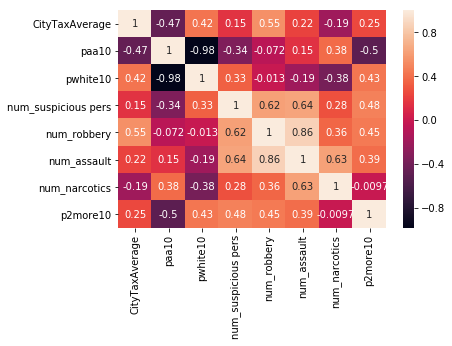

In [43]:
sns.heatmap(merged_df[["Neighborhood", "CityTaxAverage", "paa10", "pwhite10", "num_suspicious pers", "num_robbery", "num_assault","num_narcotics", "p2more10"]].corr(), annot = True)

So we can observe some interesting things from this heatmap: 

- The percentage of whites is negatively correlated with the percentage of blacks, at -.98

- The number of suspicious person calls is negatively correlated with the percentage of african americans, and opposite for the percentage of whites

- The percentage households >= 2 is negatively correlated with the percentage of african americans, and opposite for whites. 

- The number of Robberies is positively corrlated with the CityTaxAverage, with .55 correlation, and interestingly, there is barely any correlation between the percentage of african americans and whites and the number of robberies. However, there is a nother pos/neg correlation between tax avg and blacks and whites